# Let's divide users in gropus of interactions

In [10]:
from Utils.Toolkit import TestGen, TestSplit, DataReader
import numpy as np

URM_all = DataReader().URM_CSR()
target_users = DataReader().targetUsersList

lou_matrices = TestGen(URM_all, TestSplit.LEAVE_ONE_OUT)

URM_train = lou_matrices.URM_train
URM_train = URM_train.tocsr()
URM_test = lou_matrices.URM_test

(30911, 18495)


In [11]:
profile_length = np.ediff1d(URM_train.indptr)
profile_length[:10]

array([ 6,  5,  9,  0,  7, 35,  4,  3,  2, 13], dtype=int32)

In [33]:
block_size = int(len(profile_length)*0.10)
block_size

3091

In [34]:
sorted_users = np.argsort(profile_length)
sorted_users.shape

(30911,)

In [35]:
for group_id in range(0, 10):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, average p.len {:.2f}, min {}, max {}".format(group_id, 
        users_in_group_p_len.mean(), users_in_group_p_len.min(), users_in_group_p_len.max()))

Group 0, average p.len 0.00, min 0, max 0
Group 1, average p.len 0.00, min 0, max 0
Group 2, average p.len 1.19, min 0, max 2
Group 3, average p.len 2.88, min 2, max 4
Group 4, average p.len 4.94, min 4, max 6
Group 5, average p.len 7.49, min 6, max 9
Group 6, average p.len 10.98, min 9, max 13
Group 7, average p.len 16.06, min 13, max 19
Group 8, average p.len 24.36, min 19, max 31
Group 9, average p.len 52.03, min 31, max 503


In [49]:
from Algorithms.Base.NonPersonalizedRecommender import TopPop

topPop = TopPop(URM_train)
topPop.fit()

TopPopRecommender: URM Detected 6473 (20.94 %) cold users.
TopPopRecommender: URM Detected 3368 (18.21 %) cold items.


In [50]:
from CF.item_cf import ItemBasedCollaborativeFiltering
from CF.user_cf import UserBasedCollaborativeFiltering

itemCF = ItemBasedCollaborativeFiltering(topK=10, shrink=20)
itemCF.fit(URM_train)
userCF = UserBasedCollaborativeFiltering(topK=10, shrink=500)
userCF.fit(URM_train)

In [117]:
from Algorithms.SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Algorithms.Base.Evaluation.Evaluator import EvaluatorHoldout
from Algorithms.Notebooks_utils.data_splitter import train_test_holdout


URM_train, URM_validation = train_test_holdout(URM_train, 0.85)
evaluator_validation_early_stopping = EvaluatorHoldout(URM_validation, cutoff_list=[10], exclude_seen=True)
recommender = SLIM_BPR_Cython(URM_train, verbose=False)
recommender.fit(topK=100,
                lambda_i=(60/100),
                lambda_j=(6/100),
                epochs = 1000,
                validation_every_n = 50,
                stop_on_validation = True,
                evaluator_object = evaluator_validation_early_stopping,
                lower_validations_allowed = 10,
                validation_metric = "MAP"
        )

Deallocating Cython objects
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Epoch 1 of 1000. Elapsed time 0.02 sec
SLIM_BPR_Recommender: Epoch 2 of 1000. Elapsed time 0.03 sec
SLIM_BPR_Recommender: Epoch 3 of 1000. Elapsed time 0.05 sec
SLIM_BPR_Recommender: Epoch 4 of 1000. Elapsed time 0.07 sec
SLIM_BPR_Recommender: Epoch 5 of 1000. Elapsed time 0.09 sec
SLIM_BPR_Recommender: Epoch 6 of 1000. Elapsed time 0.11 sec
SLIM_BPR_Recommender: Epoch 7 of 1000. Elapsed time 0.13 sec
SLIM_BPR_Recommender: Epoch 8 of 1000. Elapsed time 0.15 sec
SLIM_BPR_Recommender: Epoch 9 of 1000. Elapsed time 0.17 sec
SLIM_BPR_Recommender: Epoch 10 of 1000. Elapsed time 0.19 sec
SLIM_BPR_Recommender: Epoch 11 of 1000. Elapsed time 0.21 sec
SLIM_BPR_Recommender: Epoch 12 of 1000. Elapsed time 0.23 sec
SLIM_BPR_Recommender: Epoch 13 of 1000. Elapsed time 0.25 sec
SLIM_BPR_Recommender: Epoch 14 of 1000. Elapsed time 0.27 sec
SLIM_BPR_Recommender: Epoch 15 of 1000. Elapsed time 0.29 s

SLIM_BPR_Recommender: Epoch 112 of 1000. Elapsed time 17.00 sec
SLIM_BPR_Recommender: Epoch 113 of 1000. Elapsed time 17.02 sec
SLIM_BPR_Recommender: Epoch 114 of 1000. Elapsed time 17.04 sec
SLIM_BPR_Recommender: Epoch 115 of 1000. Elapsed time 17.06 sec
SLIM_BPR_Recommender: Epoch 116 of 1000. Elapsed time 17.09 sec
SLIM_BPR_Recommender: Epoch 117 of 1000. Elapsed time 17.10 sec
SLIM_BPR_Recommender: Epoch 118 of 1000. Elapsed time 17.12 sec
SLIM_BPR_Recommender: Epoch 119 of 1000. Elapsed time 17.14 sec
SLIM_BPR_Recommender: Epoch 120 of 1000. Elapsed time 17.15 sec
SLIM_BPR_Recommender: Epoch 121 of 1000. Elapsed time 17.17 sec
SLIM_BPR_Recommender: Epoch 122 of 1000. Elapsed time 17.19 sec
SLIM_BPR_Recommender: Epoch 123 of 1000. Elapsed time 17.20 sec
SLIM_BPR_Recommender: Epoch 124 of 1000. Elapsed time 17.22 sec
SLIM_BPR_Recommender: Epoch 125 of 1000. Elapsed time 17.24 sec
SLIM_BPR_Recommender: Epoch 126 of 1000. Elapsed time 17.25 sec
SLIM_BPR_Recommender: Epoch 127 of 1000.

SLIM_BPR_Recommender: Epoch 222 of 1000. Elapsed time 34.23 sec
SLIM_BPR_Recommender: Epoch 223 of 1000. Elapsed time 34.25 sec
SLIM_BPR_Recommender: Epoch 224 of 1000. Elapsed time 34.26 sec
SLIM_BPR_Recommender: Epoch 225 of 1000. Elapsed time 34.28 sec
SLIM_BPR_Recommender: Epoch 226 of 1000. Elapsed time 34.30 sec
SLIM_BPR_Recommender: Epoch 227 of 1000. Elapsed time 34.31 sec
SLIM_BPR_Recommender: Epoch 228 of 1000. Elapsed time 34.33 sec
SLIM_BPR_Recommender: Epoch 229 of 1000. Elapsed time 34.35 sec
SLIM_BPR_Recommender: Epoch 230 of 1000. Elapsed time 34.36 sec
SLIM_BPR_Recommender: Epoch 231 of 1000. Elapsed time 34.38 sec
SLIM_BPR_Recommender: Epoch 232 of 1000. Elapsed time 34.40 sec
SLIM_BPR_Recommender: Epoch 233 of 1000. Elapsed time 34.41 sec
SLIM_BPR_Recommender: Epoch 234 of 1000. Elapsed time 34.43 sec
SLIM_BPR_Recommender: Epoch 235 of 1000. Elapsed time 34.45 sec
SLIM_BPR_Recommender: Epoch 236 of 1000. Elapsed time 34.46 sec
SLIM_BPR_Recommender: Epoch 237 of 1000.

SLIM_BPR_Recommender: Epoch 332 of 1000. Elapsed time 50.27 sec
SLIM_BPR_Recommender: Epoch 333 of 1000. Elapsed time 50.29 sec
SLIM_BPR_Recommender: Epoch 334 of 1000. Elapsed time 50.30 sec
SLIM_BPR_Recommender: Epoch 335 of 1000. Elapsed time 50.32 sec
SLIM_BPR_Recommender: Epoch 336 of 1000. Elapsed time 50.34 sec
SLIM_BPR_Recommender: Epoch 337 of 1000. Elapsed time 50.35 sec
SLIM_BPR_Recommender: Epoch 338 of 1000. Elapsed time 50.37 sec
SLIM_BPR_Recommender: Epoch 339 of 1000. Elapsed time 50.39 sec
SLIM_BPR_Recommender: Epoch 340 of 1000. Elapsed time 50.40 sec
SLIM_BPR_Recommender: Epoch 341 of 1000. Elapsed time 50.42 sec
SLIM_BPR_Recommender: Epoch 342 of 1000. Elapsed time 50.44 sec
SLIM_BPR_Recommender: Epoch 343 of 1000. Elapsed time 50.45 sec
SLIM_BPR_Recommender: Epoch 344 of 1000. Elapsed time 50.47 sec
SLIM_BPR_Recommender: Epoch 345 of 1000. Elapsed time 50.49 sec
SLIM_BPR_Recommender: Epoch 346 of 1000. Elapsed time 50.50 sec
SLIM_BPR_Recommender: Epoch 347 of 1000.

SLIM_BPR_Recommender: Epoch 441 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 442 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 443 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 444 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 445 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 446 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 447 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 448 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 449 of 1000. Elapsed time 1.11 min
SLIM_BPR_Recommender: Validation begins...
EvaluatorHoldout: Processed 2551 ( 100.00% ) in 1.41 sec. Users per second: 1807
SLIM_BPR_Recommender: CUTOFF: 10 - ROC_AUC: 0.0010889, PRECISION: 0.0001568, PRECISION_RECALL_MIN_DEN: 0.0009147, RECALL: 0.0009147, MAP: 0.0004719, MRR: 0.0007622, NDCG: 0.0006632, F1: 0.0002677, HIT_RATE: 0.0015680, ARHR: 0.0007622, RMSE: 0.9999889, NOVELTY: 0.0035584, AVERAGE_POPULARITY: 0.0562649, DIVERS

SLIM_BPR_Recommender: CUTOFF: 10 - ROC_AUC: 0.0010453, PRECISION: 0.0001568, PRECISION_RECALL_MIN_DEN: 0.0009147, RECALL: 0.0009147, MAP: 0.0004065, MRR: 0.0006969, NDCG: 0.0006119, F1: 0.0002677, HIT_RATE: 0.0015680, ARHR: 0.0006969, RMSE: 0.9999879, NOVELTY: 0.0035595, AVERAGE_POPULARITY: 0.0562418, DIVERSITY_MEAN_INTER_LIST: 0.7332261, DIVERSITY_HERFINDAHL: 0.9732939, COVERAGE_ITEM: 0.1941606, COVERAGE_USER: 0.0825273, DIVERSITY_GINI: 0.2920945, SHANNON_ENTROPY: 8.2202906, 

SLIM_BPR_Recommender: Epoch 550 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 551 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 552 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 553 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 554 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 555 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 556 of 1000. Elapsed time 1.50 min
SLIM_BPR_Recommender: Epoch 557 of 1000. Elapsed time 1.50 min
SLIM_BPR_Reco

SLIM_BPR_Recommender: Epoch 654 of 1000. Elapsed time 1.77 min
SLIM_BPR_Recommender: Epoch 655 of 1000. Elapsed time 1.77 min
SLIM_BPR_Recommender: Epoch 656 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 657 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 658 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 659 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 660 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 661 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 662 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 663 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 664 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 665 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 666 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 667 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 668 of 1000. Elapsed time 1.78 min
SLIM_BPR_Recommender: Epoch 669 of 1000. Elapsed time 1

SLIM_BPR_Recommender: Epoch 765 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 766 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 767 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 768 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 769 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 770 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 771 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 772 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 773 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 774 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 775 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 776 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 777 of 1000. Elapsed time 2.05 min
SLIM_BPR_Recommender: Epoch 778 of 1000. Elapsed time 2.06 min
SLIM_BPR_Recommender: Epoch 779 of 1000. Elapsed time 2.06 min
SLIM_BPR_Recommender: Epoch 780 of 1000. Elapsed time 2

SLIM_BPR_Recommender: Epoch 876 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 877 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 878 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 879 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 880 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 881 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 882 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 883 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 884 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 885 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 886 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 887 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 888 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 889 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 890 of 1000. Elapsed time 2.36 min
SLIM_BPR_Recommender: Epoch 891 of 1000. Elapsed time 2

In [88]:
from NonPersonalized.top_pop import TopPop

topPop = TopPop()
topPop.fit(URM_train)

In [ ]:
from CBF.user_CBF import UserContentBasedRecommender

userCBF = UserContentBasedRecommender()

# Evaluate for different user groups

In [113]:
from Algorithms.Notebooks_utils.evaluation_function import evaluate_MAP_target_users

MAP_itemCF = []
MAP_userCF = []
MAP_SLIM = []
MAP_topPop = []

for group_id in range(0, 10):
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, average p.len {:.2f}, min {}, max {}".format(group_id, 
        users_in_group_p_len.mean(), users_in_group_p_len.min(), users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert = True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluate_map = evaluate_MAP_target_users(URM_test, itemCF, users_in_group, verbose=False)
    MAP_itemCF.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, userCF, users_in_group, verbose=False)
    MAP_userCF.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, recommender, users_in_group, verbose=False)
    MAP_SLIM.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, topPop, users_in_group, verbose=False)
    MAP_topPop.append(evaluate_map)

Group 0, average p.len 0.00, min 0, max 0
Group 1, average p.len 0.00, min 0, max 0
Group 2, average p.len 1.19, min 0, max 2
Group 3, average p.len 2.88, min 2, max 4
Group 4, average p.len 4.94, min 4, max 6
Group 5, average p.len 7.49, min 6, max 9
Group 6, average p.len 10.98, min 9, max 13
Group 7, average p.len 16.06, min 13, max 19
Group 8, average p.len 24.36, min 19, max 31
Group 9, average p.len 52.03, min 31, max 503


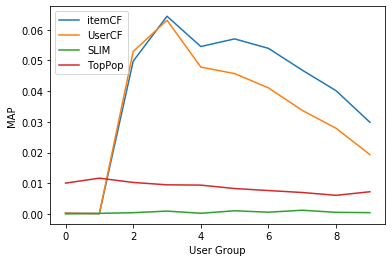

In [114]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(MAP_itemCF, label="itemCF")
pyplot.plot(MAP_userCF, label="UserCF")
pyplot.plot(MAP_SLIM, label="SLIM")
pyplot.plot(MAP_topPop, label="TopPop")
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()